In [15]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np

In [16]:
dow = fdr.DataReader('DJI', '2010-06-01')

In [17]:
kospi = fdr.DataReader('KS11', '2010-06-01')

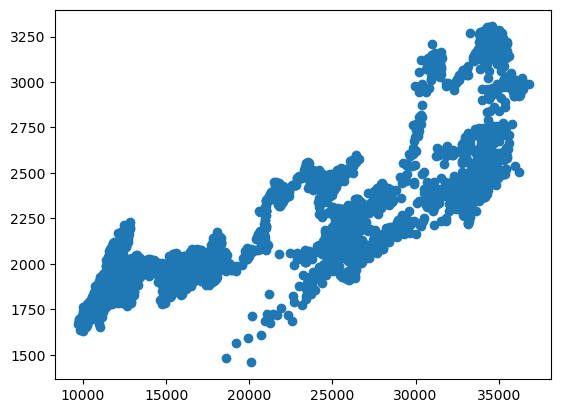

In [18]:
dow_kospi_df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
dow_kospi_df = dow_kospi_df.fillna(method='bfill')
dow_kospi_df = dow_kospi_df.fillna(method='ffill')
plt.scatter(dow_kospi_df['DOW'], dow_kospi_df['KOSPI'])

In [19]:
print("Dow Jones and KOSPI correlation coefficient(-1 ~ 1)")
dow_kospi_df.corr()

Dow Jones and KOSPI correlation coefficient(-1 ~ 1)


,DOW,KOSPI
DOW,1.000000,0.820498
KOSPI,0.820498,1.000000


In [20]:
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72000,2,-800,-1.10,72400,72500,71700,9871284,710939612000,429824343600000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,428500,2,-26000,-5.72,444000,448000,428500,498100,215049437500,100269000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,132600,2,-1300,-0.97,132200,133000,130800,3641222,480440675249,96533113599000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,711000,2,-14000,-1.93,725000,727000,711000,48585,34875411708,50604714000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,57900,3,0,0.00,58000,58000,57600,989923,57228720713,47645139930000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,288490,KR7288490006,나라소프트,KONEX,일반기업부,81,1,6,8.00,75,84,72,162101,12473206,3504627405,43267005,KNX
2778,217320,KR7217320001,썬테크,KONEX,일반기업부,3195,0,0,0.00,0,0,0,0,0,3354750000,1050000,KNX
2779,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1589,3,0,0.00,1599,1599,1589,15,23845,2510556440,1579960,KNX
2780,308700,KR7308700004,테크엔,KONEX,일반기업부,592,3,0,0.00,504,592,504,2,1096,2368000000,4000000,KNX


In [21]:
print("input index number(Refer to the data fields above): ")
num = int(input())
code = str(df_krx.loc[num, 'Code'])
url = 'https://finance.naver.com/item/sise_day.nhn?code={}'.format(code)

input index number(Refer to the data fields above): 
0


In [22]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [23]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
df = pd.DataFrame()
for page in range(1, 10):
    page_url = '{}&page={}'.format(url, page)
    
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))
    
    df = pd.concat([df,table[0].dropna()])

In [24]:
df = df.dropna()
df = df.iloc[0:50] 
df = df.sort_values(by='날짜')
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2023.09.18,70200.0,1800.0,71300.0,71700.0,70200.0,16040727.0
12,2023.09.19,69800.0,400.0,70400.0,70800.0,69600.0,11820188.0
11,2023.09.20,69600.0,200.0,70000.0,70300.0,69500.0,10873015.0
10,2023.09.21,68900.0,700.0,69200.0,69800.0,68800.0,10796336.0
9,2023.09.22,68800.0,100.0,68300.0,68900.0,68300.0,9897840.0
5,2023.09.25,69400.0,600.0,68500.0,69700.0,68500.0,13582516.0
4,2023.09.26,68600.0,800.0,70000.0,70000.0,68400.0,13143470.0
3,2023.09.27,68400.0,200.0,68600.0,69100.0,68200.0,14886491.0
2,2023.10.04,67500.0,900.0,67400.0,67700.0,66700.0,23361149.0
1,2023.10.05,66700.0,800.0,67300.0,67400.0,66700.0,16108313.0


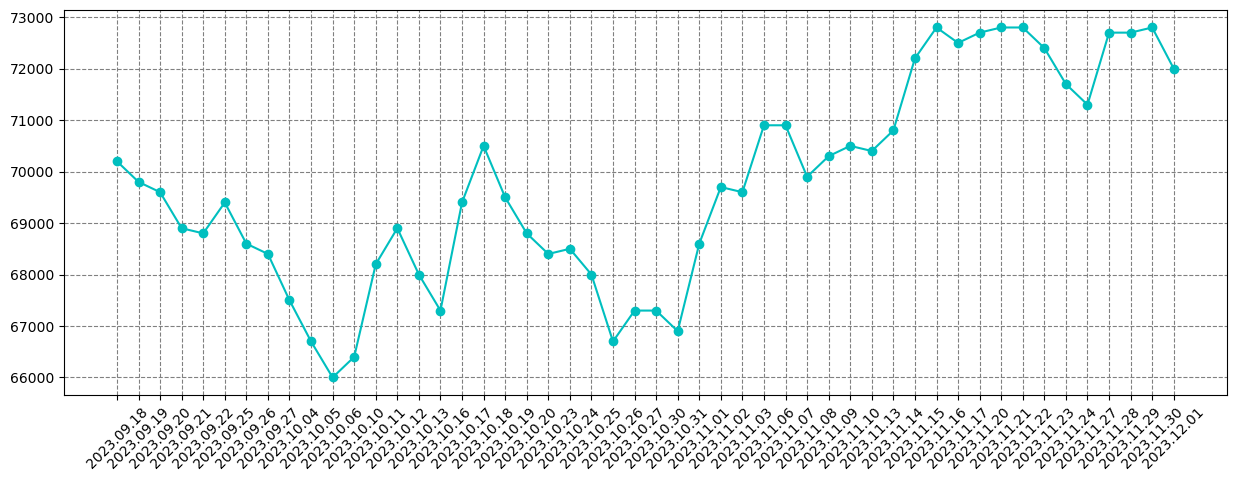

In [25]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

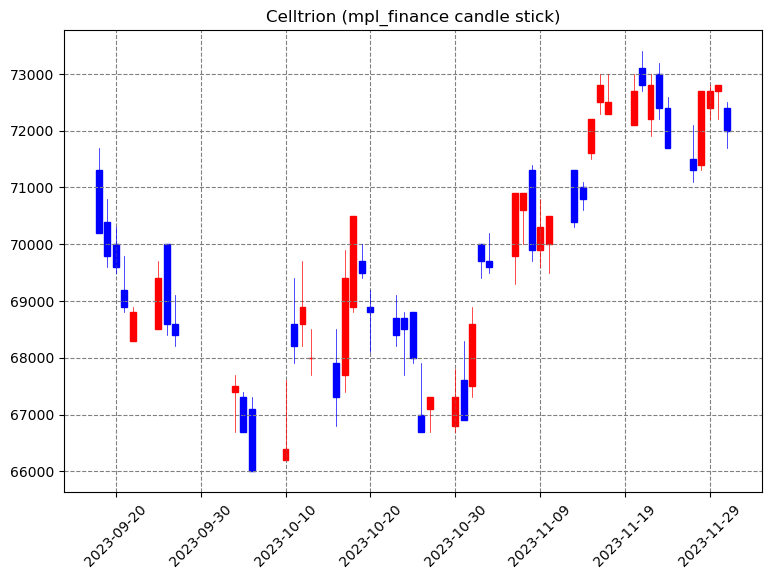

In [26]:
df = df.sort_values(by='날짜')

for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() 
    df['날짜'].values[idx] = mdates.date2num(dt)

ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Celltrion (mpl_finance candle stick)')

candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

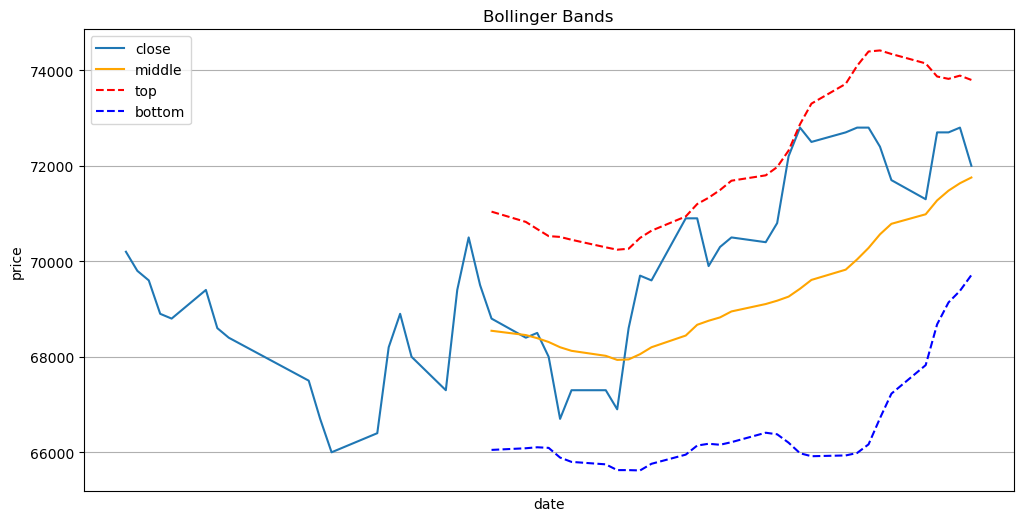

In [27]:
df['날짜'] = pd.to_datetime(df['날짜'])

df['중간밴드'] = df['종가'].rolling(window=20).mean()
df['표준편차'] = df['종가'].rolling(window=20).std()
df['상단밴드'] = df['중간밴드'] + 2 * df['표준편차']
df['하단밴드'] = df['중간밴드'] - 2 * df['표준편차']

plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['종가'], label='close')
plt.plot(df['날짜'], df['중간밴드'], label='middle', color='orange')
plt.plot(df['날짜'], df['상단밴드'], label='top', linestyle='--', color='red')
plt.plot(df['날짜'], df['하단밴드'], label='bottom', linestyle='--', color='blue')

plt.title('Bollinger Bands')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()